In [9]:
import pandas as pd

user = pd.read_csv('../Datasets/Samples/User.csv')

user = user.set_index('user_name')

user

,first_name,last_name,year,month,day,telephone
user_name,,,,,,
jsmith,John,Smyth,1972,1,1,5454545.0
tjones,Tom,Jones,1975,7,22,87745452.0
xooo2,Emma,Brooks,1979,8,10,1231326.0
tra4545,Jane,Trainer,1980,12,12,54287822.0
blog123,Joe,Bloggs,1956,11,29,NaN
smi345,Laura,Smith,1963,7,18,NaN


In [3]:
job = pd.read_csv('../Datasets/Samples/job.csv')

job

,user_name,job_name,year,month,day
0,jsmith,computer programmer,1990,2,15
1,tjones,computer programmer,1990,10,16
2,tra4545,computer programmer,1999,1,30
3,tjones,manager,1999,3,4
4,blog123,ceo,1981,10,8


In [23]:
merged = pd.merge(user, job, on='user_name', how='outer', suffixes=['_user','_job'], validate='1:m')

merged

,user_name,first_name,last_name,year_user,month_user,day_user,telephone,job_name,year_job,month_job,day_job
0,jsmith,John,Smyth,1972,1,1,5454545.0,computer programmer,1990.0,2.0,15.0
1,tjones,Tom,Jones,1975,7,22,87745452.0,computer programmer,1990.0,10.0,16.0
2,tjones,Tom,Jones,1975,7,22,87745452.0,manager,1999.0,3.0,4.0
3,xooo2,Emma,Brooks,1979,8,10,1231326.0,NaN,NaN,NaN,NaN
4,tra4545,Jane,Trainer,1980,12,12,54287822.0,computer programmer,1999.0,1.0,30.0
5,blog123,Joe,Bloggs,1956,11,29,NaN,ceo,1981.0,10.0,8.0
6,smi345,Laura,Smith,1963,7,18,NaN,NaN,NaN,NaN,NaN


In [24]:
merged = merged.dropna(subset=['telephone', 'job_name'])

merged

,user_name,first_name,last_name,year_user,month_user,day_user,telephone,job_name,year_job,month_job,day_job
0,jsmith,John,Smyth,1972,1,1,5454545.0,computer programmer,1990.0,2.0,15.0
1,tjones,Tom,Jones,1975,7,22,87745452.0,computer programmer,1990.0,10.0,16.0
2,tjones,Tom,Jones,1975,7,22,87745452.0,manager,1999.0,3.0,4.0
4,tra4545,Jane,Trainer,1980,12,12,54287822.0,computer programmer,1999.0,1.0,30.0


In [25]:
merged = merged.reset_index(drop=True)

merged

,user_name,first_name,last_name,year_user,month_user,day_user,telephone,job_name,year_job,month_job,day_job
0,jsmith,John,Smyth,1972,1,1,5454545.0,computer programmer,1990.0,2.0,15.0
1,tjones,Tom,Jones,1975,7,22,87745452.0,computer programmer,1990.0,10.0,16.0
2,tjones,Tom,Jones,1975,7,22,87745452.0,manager,1999.0,3.0,4.0
3,tra4545,Jane,Trainer,1980,12,12,54287822.0,computer programmer,1999.0,1.0,30.0


In [27]:
merged = merged.loc[merged['year_user'] >=1975]

merged

,user_name,first_name,last_name,year_user,month_user,day_user,telephone,job_name,year_job,month_job,day_job
1,tjones,Tom,Jones,1975,7,22,87745452.0,computer programmer,1990.0,10.0,16.0
2,tjones,Tom,Jones,1975,7,22,87745452.0,manager,1999.0,3.0,4.0
3,tra4545,Jane,Trainer,1980,12,12,54287822.0,computer programmer,1999.0,1.0,30.0


In [30]:


merged['job_name'] = pd.Categorical(merged['job_name'])

merged.dtypes

merged.to_pickle('merged.pkl')

In [31]:
pickle = pd.read_pickle('merged.pkl')

pickle

,user_name,first_name,last_name,year_user,month_user,day_user,telephone,job_name,year_job,month_job,day_job
1,tjones,Tom,Jones,1975,7,22,87745452.0,computer programmer,1990.0,10.0,16.0
2,tjones,Tom,Jones,1975,7,22,87745452.0,manager,1999.0,3.0,4.0
3,tra4545,Jane,Trainer,1980,12,12,54287822.0,computer programmer,1999.0,1.0,30.0


In [40]:
user2 = user.assign(DOB = pd.to_datetime({
    'year': user.year,
    'month': user.month,
    'day': user.day
}))

user2 = user2.drop(columns=['year','month', 'day'])

user2


job2 = job.assign(start_date = pd.to_datetime({
    'year': job.year,
    'month': job.month,
    'day': job.day
}))

job2 = job2.drop(columns=['year','month', 'day'])

job2


merged2 = pd.merge(user2, job2, on='user_name')

merged2

merged2.to_pickle('merged2.pkl')

In [50]:
goals = pd.read_csv('../Datasets/Samples/Goals.csv')

#goals.plot.bar()

goals = goals.pivot(index='Name', columns='Year', values='Goals')

#goals.plot.bar()

goals = goals.reset_index()

goals = pd.melt(goals, id_vars=['Name'], value_vars=range(2000,2012), value_name='Goals')

goals

,Name,Year,Goals
0,John,2000,47
1,Nathan,2000,21
2,Stephen,2000,17
3,Terry,2000,35
4,John,2001,29
5,Nathan,2001,43
6,Stephen,2001,23
7,Terry,2001,24
8,John,2002,14
9,Nathan,2002,12


In [55]:
goals2 = goals.set_index(['Name', 'Year'])

goals2 = goals2.sort_index()

goals2 = goals2.swaplevel()

goals2 = goals2.sort_index()

goals2

Empty DataFrame
Columns: []
Index: [(John, 10, 2005), (John, 11, 2007), (John, 14, 2002), (John, 23, 2006), (John, 28, 2008), (John, 29, 2001), (John, 34, 2003), (John, 41, 2009), (John, 47, 2000), (John, 49, 2010), (John, 49, 2011), (John, 50, 2004), (Nathan, 3, 2008), (Nathan, 4, 2009), (Nathan, 12, 2002), (Nathan, 16, 2003), (Nathan, 21, 2000), (Nathan, 33, 2006), (Nathan, 38, 2004), (Nathan, 38, 2011), (Nathan, 41, 2007), (Nathan, 43, 2001), (Nathan, 48, 2010), (Nathan, 50, 2005), (Stephen, 3, 2009), (Stephen, 10, 2006), (Stephen, 17, 2000), (Stephen, 17, 2008), (Stephen, 18, 2010), (Stephen, 19, 2004), (Stephen, 23, 2001), (Stephen, 25, 2003), (Stephen, 31, 2005), (Stephen, 33, 2011), (Stephen, 37, 2007), (Stephen, 47, 2002), (Terry, 0, 2004), (Terry, 3, 2006), (Terry, 19, 2009), (Terry, 21, 2010), (Terry, 24, 2001), (Terry, 24, 2005), (Terry, 25, 2011), (Terry, 35, 2000), (Terry, 35, 2008), (Terry, 39, 2007), (Terry, 46, 2003), (Terry, 47, 2002)]

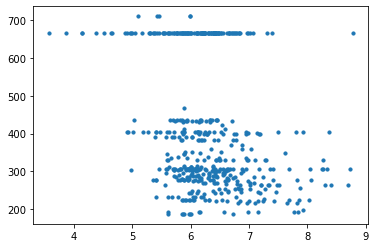

Homogeneity_score:  0.147757134650399
Silhouette_score:  0.7596046280969165


array([0])

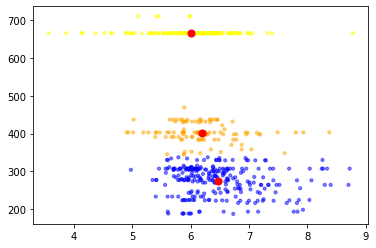

In [138]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.colors as color
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston, load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn import metrics


boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)

df["MEDV"] = boston.target

df.loc[(df["MEDV"] < 10), "CLASS"] = 0
df.loc[(df["MEDV"] > 30), "CLASS"] = 2
df.loc[(df["MEDV"] >= 10) & (df["MEDV"] <= 30), "CLASS"] = 1


x = df[['RM', 'TAX']].to_numpy()

plt.scatter(x[:, 0],x[:,1], s=10)

plt.show()

model = KMeans(n_clusters=3).fit(x)
#model = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0).fit(x)
#model = MeanShift(bandwidth=.5).fit(x)

labels = model.labels_

centroids = model.cluster_centers_


colors = ['blue','green', 'yellow', 'orange']

plt.scatter(x[:,0], x[:, 1], s=10, c=labels, cmap=color.ListedColormap(colors), alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=50)

print("Homogeneity_score: ", metrics.homogeneity_score(df['CLASS'], labels))
print("Silhouette_score: ", metrics.silhouette_score(x, labels))

model.predict([[1,1]])

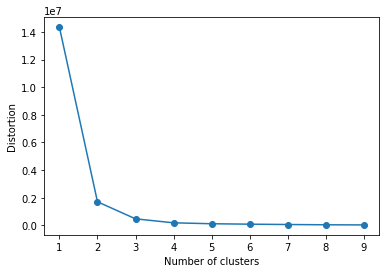

In [80]:
distortions = []

for i in range(1,10):
    model = KMeans(n_clusters=i)

    model.fit(x)

    distortions.append(model.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


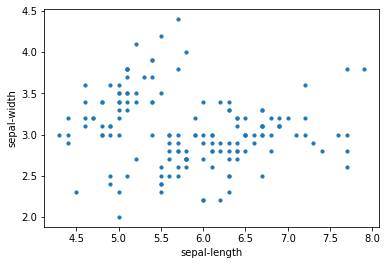

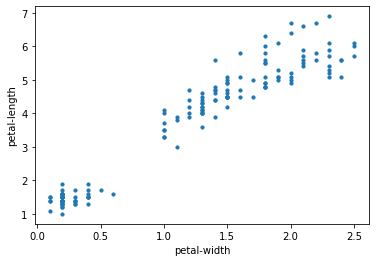

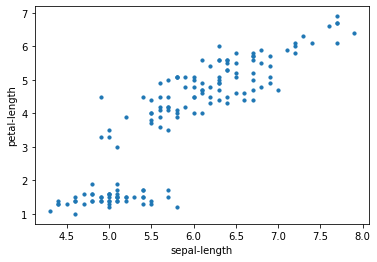

In [140]:
iris = load_iris()

#print(iris.DESCR)

df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])

df['class'] = iris.target

plt.scatter(df['sl'], df['sw'], s=10)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

plt.scatter(df['pw'], df['pl'], s=10)

plt.xlabel('petal-width')
plt.ylabel('petal-length')

plt.show()

plt.scatter(df['sl'], df['pl'], s=10)

plt.xlabel('sepal-length')
plt.ylabel('petal-length')

plt.show()


In [141]:
x = df[['sl','pl']]

model = KMeans(n_clusters=3).fit(x)

labels = model.labels_

centroids = model.cluster_centers_

print("Homogeneity_score: ", metrics.homogeneity_score(df['class'], labels))

print("Silhouette_score: ", metrics.silhouette_score(x, labels))

Homogeneity_score:  0.7033177646052958
Silhouette_score:  0.5890584158017611


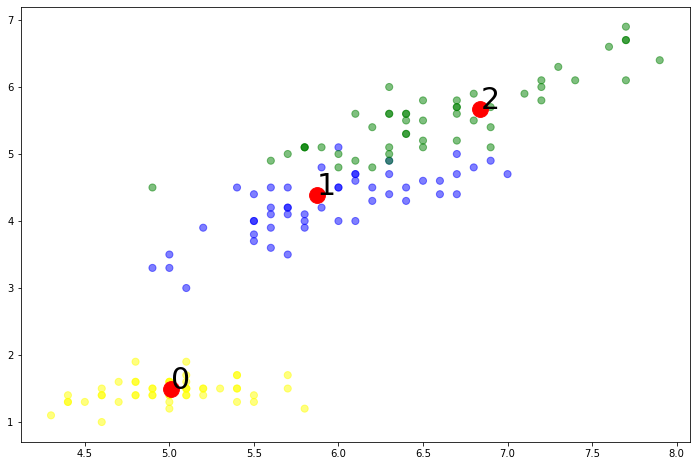

In [142]:
colors = ['yellow','blue','green']

plt.figure(figsize=(12, 8))

plt.scatter(df['sl'], df['pl'], c=df['class'], s=50,
            cmap=color.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250)

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0], centroids[i][1]), fontsize=30)

In [143]:
iris_features = df.drop('class', axis=1)
iris_features

iris_labels = df['class']

iris_labels

model = KMeans(n_clusters=3).fit(iris_features)

model = MeanShift(bandwidth=.85).fit(iris_features)

labels = model.labels_

centroids = model.cluster_centers_

print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, labels))

print("Silhouette_score: ", metrics.silhouette_score(x, labels))

centroids

Homogeneity_score:  0.7603645798041669
Silhouette_score:  0.5818562963213567


array([[6.05957447, 2.83404255, 4.58723404, 1.5       ],
       [4.98888889, 3.41111111, 1.48      , 0.24666667],
       [6.63333333, 3.06666667, 5.54814815, 2.1       ]])

In [133]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

boston = load_boston()


x = boston.data
y = boston.target

cats = pd.qcut(y, 8)

#print(cats)


y_df = pd.DataFrame(y, columns={"nums"})


y_df.loc[(y_df["nums"] < 10), "cats"] = "low"
y_df.loc[(y_df["nums"] > 20), "cats"] = "high"
y_df.loc[(y_df["nums"] >= 10) & (y_df["nums"] <= 20), "cats"] = "med"



#print(y_df)



x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33, random_state=32)


model = KNeighborsRegressor(n_neighbors=2)

model.fit(x_train, y_train)

score = model.score(x_test, y_test)

print ("Cont score", score)


x_train, x_test, y_train, y_test = train_test_split(x,y_df["cats"],test_size=.33, random_state=32)

print(y_df["cats"].value_counts()/len(y_df["cats"]))

print(y_train.value_counts()/len(y_train))

model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, y_train)

score = model.score(x_test, y_test)

print ("Cat score", score)

Cont score 0.5873408289299905
high    0.575099
med     0.377470
low     0.047431
Name: cats, dtype: float64
high    0.595870
med     0.348083
low     0.056047
Name: cats, dtype: float64
Cat score 0.7125748502994012
